In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (Scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report


Matplotlib is building the font cache; this may take a moment.


In [24]:
import pandas as pd
# Read the CSV file "Salary_Data.csv" into a pandas DataFrame
df = pd.read_csv("Salary_Data.csv")

In [26]:
#First 5 rows
print("First 5 rows")
print(df.head())

First 5 rows
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [27]:
#Describing Data and Some Statistics 
# General info (columns, types, nulls)
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None

Summary statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


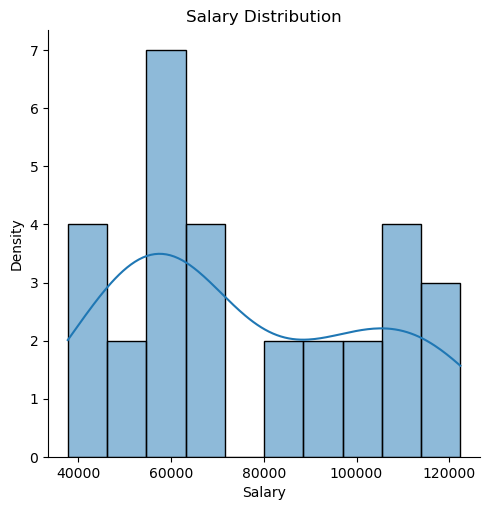

In [28]:
# Draw distribution plot for Salary
sns.displot(df["Salary"], kde=True, bins=10)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Density")

plt.show()

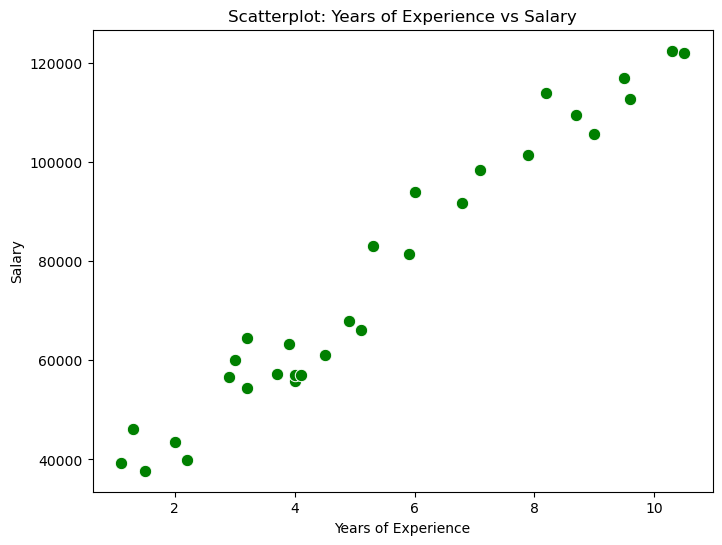

In [30]:
# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x="YearsExperience", y="Salary", data=df, color="green", s=80)

# Add title and labels
plt.title("Scatterplot: Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()

In [ ]:
#Step 6 Spklitting the Data 

In [31]:
# Independent variable (Experience)
X = df[["YearsExperience"]]   # keep as 2D DataFrame for sklearn

# Dependent variable (Salary)
y = df["Salary"]              # 1D Series

print("Independent variable (X):")
print(X.head())

print("\nDependent variable (y):")
print(y.head())

Independent variable (X):
   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2

Dependent variable (y):
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


In [ ]:
## Step 7 Split into Train/Test sets

In [32]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the sizes
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 24
Test set size: 6


In [ ]:
## Step 8 Train model

In [34]:
# Initialize the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

# Check parameters
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])

Intercept (b0): 25321.583011776813
Coefficient (b1): 9423.815323030976


In [ ]:
## Step 9  Predict results

In [35]:
# 5) Predict results on the test set
y_pred = model.predict(X_test)

print("Predicted values:", y_pred[:5])
print("Actual values:   ", y_test[:5].values)

Predicted values: [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548]
Actual values:    [112635.  67938. 113812.  83088.  64445.]


In [ ]:
## Step 10 Visualize predictions

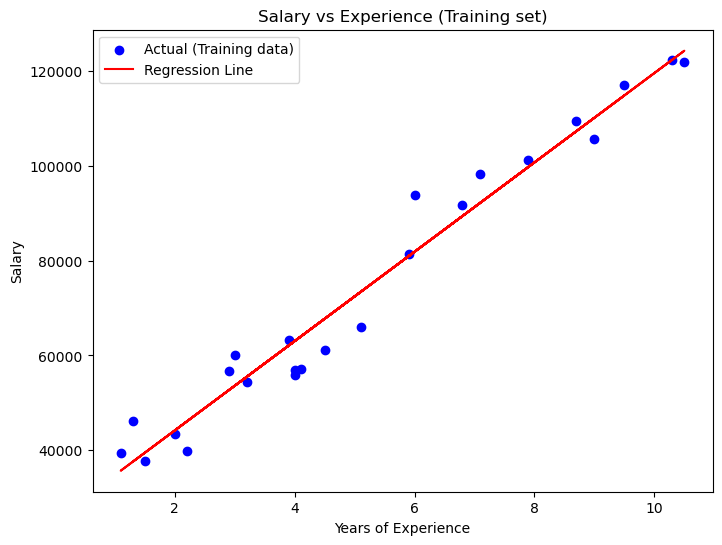

In [36]:
# Plot training set results
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color="blue", label="Actual (Training data)")
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

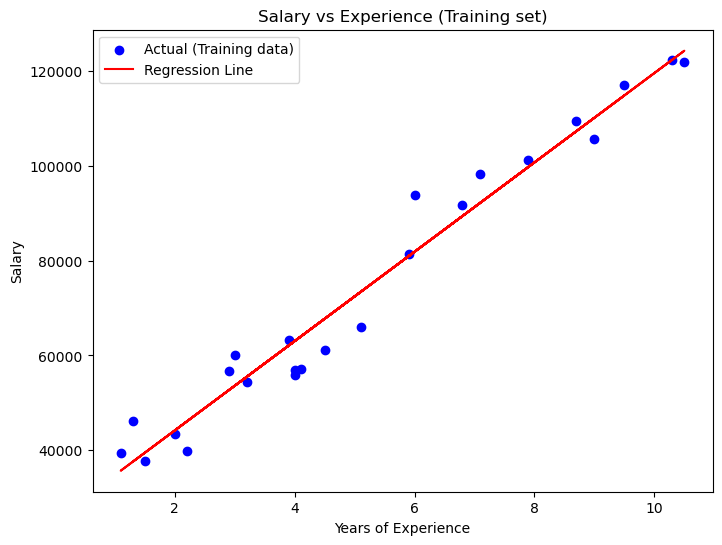

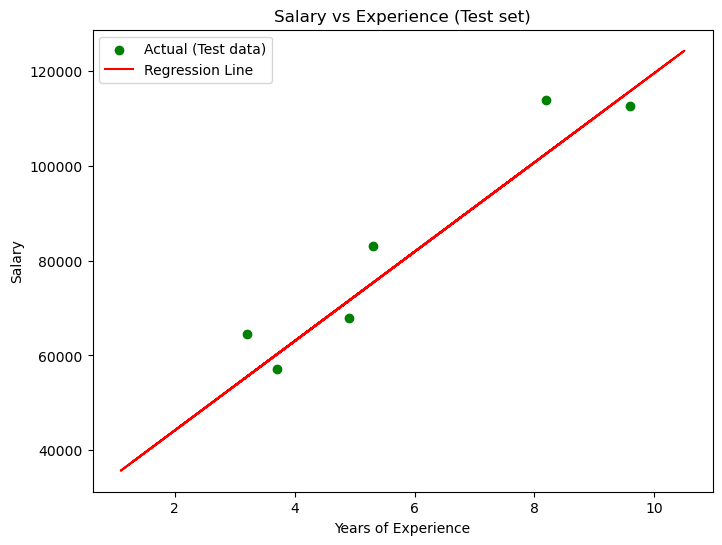

In [38]:
### Prediction on test set

# Plot Training Set Results

plt.figure(figsize=(8,6))

# Scatter plot of actual training data (blue dots)
plt.scatter(X_train, y_train, color="blue", label="Actual (Training data)")

# Regression line fitted on training data (red line)
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")

# Add title and labels
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()

plt.show()


# Plot Test Set Results
plt.figure(figsize=(8,6))

# Scatter plot of actual test data (green dots)
plt.scatter(X_test, y_test, color="green", label="Actual (Test data)")

# Regression line is the same (trained on training data)
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")

# Add title and labels
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()

plt.show()


In [ ]:
## Step 11  Coefficient and Intercept

In [39]:
# m = slope (coefficient for YearsExperience)
m = model.coef_[0]

# c = y-intercept
c = model.intercept_

print("Coefficient (m / slope):", m)
print("Intercept (c / y-intercept):", c)

# Show the regression equation
print(f"\nEquation of line: Salary = {m:.2f} * YearsExperience + {c:.2f}")

Coefficient (m / slope): 9423.815323030976
Intercept (c / y-intercept): 25321.583011776813

Equation of line: Salary = 9423.82 * YearsExperience + 25321.58
